#import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#import data file

In [65]:
df = pd.read_csv('digit_svm.csv')
df.head(10)
df.dropna()

label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          1       0       0       0  ...         0         0         0         0
1          0       0       0       0  ...         0         0         0         0
2          1       0       0       0  ...         0         0         0         0
3          4       0       0       0  ...         0         0         0         0
4          0       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
41995      0       0       0       0  ...         0         0         0         0
41996      1       0       0       0  ...         0         0         0         0
41997      7       0       0       0  ...         0         0         0         0
41998      6       0       0       0  ...         0         0         0         0
41999      9       0       0       0  ...         0         0         0         0

[42000 rows x 785 columns]

In [66]:
df.shape

(42000, 785)

#data exploration

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [68]:
df.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

label   pixel0   pixel1  ...  pixel781  pixel782  pixel783
count  42000.000000  42000.0  42000.0  ...   42000.0   42000.0   42000.0
mean       4.456643      0.0      0.0  ...       0.0       0.0       0.0
std        2.887730      0.0      0.0  ...       0.0       0.0       0.0
min        0.000000      0.0      0.0  ...       0.0       0.0       0.0
5%         0.000000      0.0      0.0  ...       0.0       0.0       0.0
10%        1.000000      0.0      0.0  ...       0.0       0.0       0.0
25%        2.000000      0.0      0.0  ...       0.0       0.0       0.0
50%        4.000000      0.0      0.0  ...       0.0       0.0       0.0
75%        7.000000      0.0      0.0  ...       0.0       0.0       0.0
90%        8.000000      0.0      0.0  ...       0.0       0.0       0.0
99%        9.000000      0.0      0.0  ...       0.0       0.0       0.0
max        9.000000      0.0      0.0  ...       0.0       0.0       0.0

[12 rows x 785 columns]

In [69]:
#checking for null values
round(100*(df.isnull().sum()/(len(df.index))),2).sort_values(ascending = False)

pixel783    0.0
pixel267    0.0
pixel265    0.0
pixel264    0.0
pixel263    0.0
pixel262    0.0
pixel261    0.0
pixel260    0.0
pixel259    0.0
pixel258    0.0
pixel257    0.0
pixel256    0.0
pixel255    0.0
pixel254    0.0
pixel253    0.0
pixel252    0.0
pixel251    0.0
pixel250    0.0
pixel249    0.0
pixel248    0.0
pixel247    0.0
pixel246    0.0
pixel245    0.0
pixel266    0.0
pixel268    0.0
pixel390    0.0
pixel269    0.0
pixel290    0.0
pixel289    0.0
pixel288    0.0
pixel287    0.0
pixel286    0.0
pixel285    0.0
pixel284    0.0
pixel283    0.0
pixel282    0.0
pixel281    0.0
pixel280    0.0
pixel279    0.0
pixel278    0.0
pixel277    0.0
pixel276    0.0
pixel275    0.0
pixel274    0.0
pixel273    0.0
pixel272    0.0
pixel271    0.0
pixel270    0.0
pixel244    0.0
pixel243    0.0
pixel242    0.0
pixel241    0.0
pixel216    0.0
pixel215    0.0
pixel214    0.0
pixel213    0.0
pixel212    0.0
pixel211    0.0
pixel210    0.0
pixel209    0.0
pixel208    0.0
pixel207    0.0
pixel206

In [70]:
# let us check unique entries of label column
np.unique(df['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [71]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


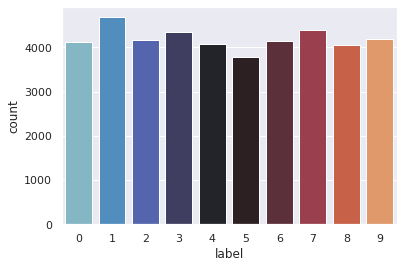

In [72]:
#visualising the column - label
sns.countplot(df['label'],palette = 'icefire')

Text(0, 0.5, 'Frequency')

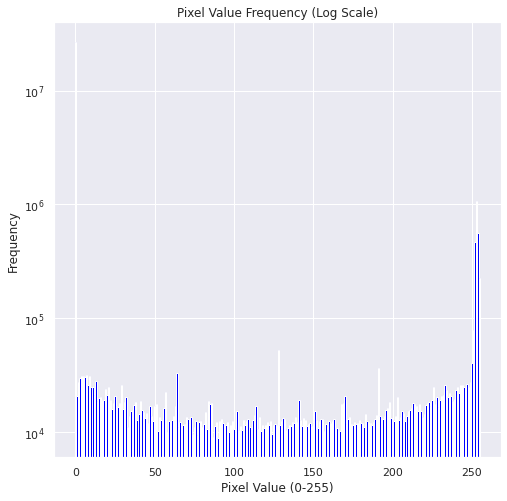

In [73]:
y = pd.value_counts(df.values.ravel()).sort_index()
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[8,8])
plt.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


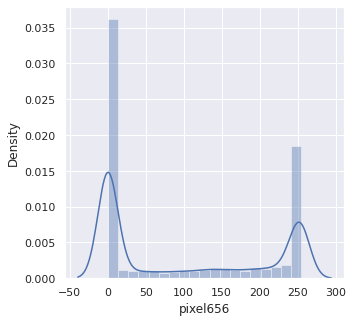

In [74]:
plt.figure(figsize=(5,5))
sns.distplot(df['pixel656'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


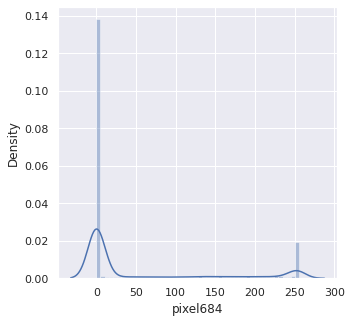

In [75]:
plt.figure(figsize=(5,5))
sns.distplot(df['pixel684'])

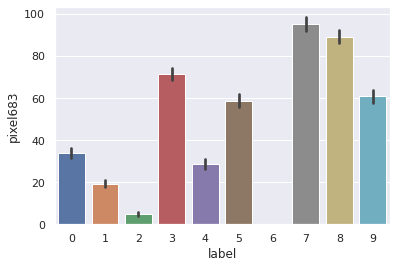

In [76]:
sns.barplot(x='label', y='pixel683', data=df)

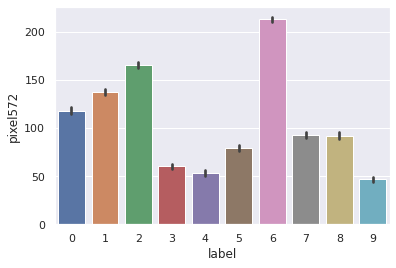

In [77]:
sns.barplot(x='label', y='pixel572', data=df)

Text(0.5, 1.0, 'Digit 1')

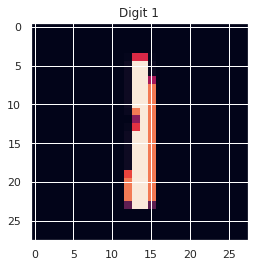

In [78]:
one = df.iloc[2, 1:]
one = one.values.reshape(28,28)
plt.imshow(one)
plt.title("Digit 1")

Text(0.5, 1.0, 'Digit 0')

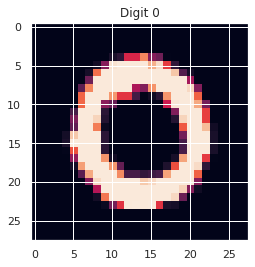

In [79]:
zero = df.iloc[1, 1:]
zero = zero.values.reshape(28,28)
plt.imshow(zero)
plt.title("Digit 0")

Text(0.5, 1.0, 'Digit 9')

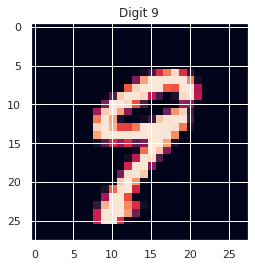

In [80]:
nine = df.iloc[11, 1:]
nine = nine.values.reshape(28,28)
plt.imshow(nine)
plt.title("Digit 9")

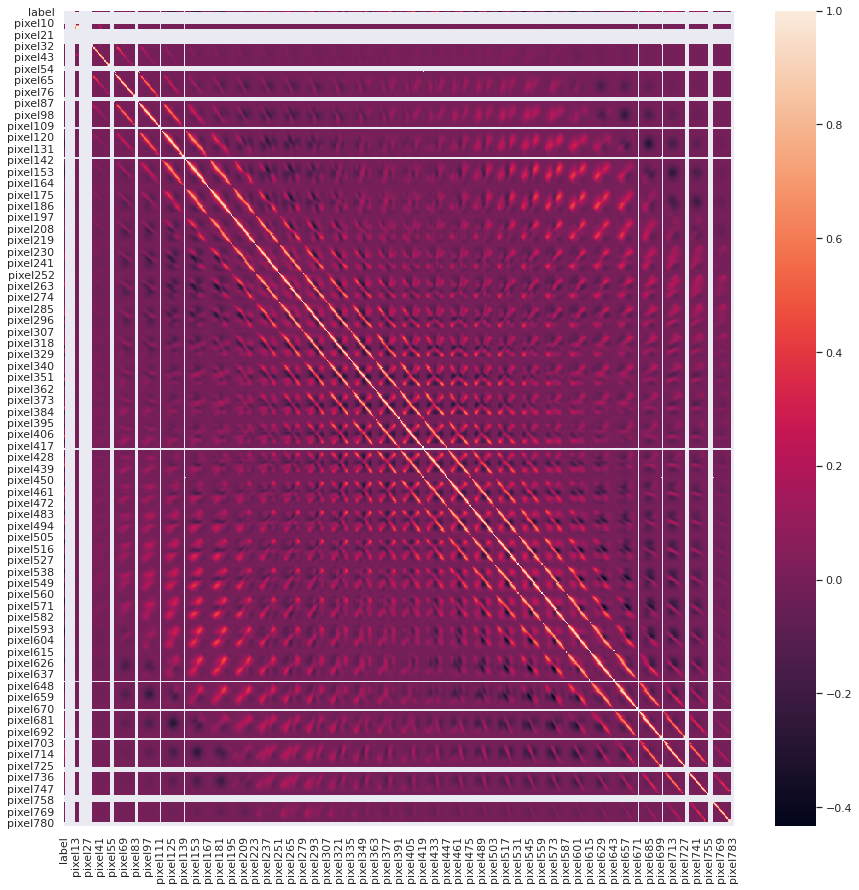

In [81]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(),annot=False)

In [82]:
# average feature values
pd.set_option('display.max_rows', 999)
round(df.drop('label', axis=1).mean(), 2).sort_values(ascending = False)

pixel407    139.83
pixel435    139.07
pixel408    137.42
pixel434    135.52
pixel211    135.49
pixel210    133.59
pixel602    132.98
pixel212    132.90
pixel436    132.00
pixel601    130.81
pixel380    130.66
pixel406    130.14
pixel409    128.65
pixel381    127.50
pixel463    127.45
pixel575    126.73
pixel603    126.34
pixel209    126.26
pixel629    126.03
pixel462    126.01
pixel213    126.00
pixel574    125.56
pixel183    124.89
pixel379    124.51
pixel237    123.89
pixel238    123.23
pixel433    123.10
pixel628    122.65
pixel600    122.59
pixel240    122.22
pixel239    121.98
pixel184    121.90
pixel630    121.89
pixel241    121.77
pixel437    121.70
pixel464    121.32
pixel236    120.60
pixel182    119.70
pixel576    119.67
pixel547    118.65
pixel353    118.46
pixel548    117.19
pixel573    116.96
pixel242    116.12
pixel491    115.44
pixel461    115.36
pixel405    114.96
pixel352    113.93
pixel627    113.00
pixel208    112.99
pixel214    112.65
pixel492    112.60
pixel519    

In [83]:
# splitting into X and y
X = df.drop("label", axis = 1)
y = df['label']

In [84]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.2,test_size = 0.8)

In [85]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (8400, 784)
y_train shape: (8400,)
X_test shape: (33600, 784)
y_test shape: (33600,)


#linear model

In [86]:
# linear model
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [87]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9119345238095238 

[[3183    0   19    9   12   31   36    1    7    1]
 [   1 3683   12   17    1    7    3    7   20    2]
 [  35   31 3027   71   63   13   28   39   42    7]
 [  15   18   94 3115    4  133    7   26   88   17]
 [   7   16   26    6 3055    6   13   11    2  105]
 [  48   49   20  169   33 2566   37   10   51   18]
 [  37    7   46    4   34   32 3112    1    9    0]
 [   6   27   52   38   61    7    1 3204    8  124]
 [  29   76   33  124   19  104   28   21 2775   22]
 [  16   26   12   25  181   15    2  159   29 2921]]


In [88]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3299
           1       0.94      0.98      0.96      3753
           2       0.91      0.90      0.90      3356
           3       0.87      0.89      0.88      3517
           4       0.88      0.94      0.91      3247
           5       0.88      0.86      0.87      3001
           6       0.95      0.95      0.95      3282
           7       0.92      0.91      0.91      3528
           8       0.92      0.86      0.89      3231
           9       0.91      0.86      0.88      3386

    accuracy                           0.91     33600
   macro avg       0.91      0.91      0.91     33600
weighted avg       0.91      0.91      0.91     33600



#poly kernel

In [89]:
# non-linear model
# using poly kernel, C=1, default value of gamma

# model
non_linear_model_poly = SVC(kernel='poly')

# fit
non_linear_model_poly.fit(X_train, y_train)

# predict
y_pred = non_linear_model_poly.predict(X_test)

In [90]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9030952380952381 

[[3016    0   10    2   38   28   33    0  170    2]
 [   0 3673    9    4   11    0    5    1   49    1]
 [   7   15 2709   52  128    4    5   25  402    9]
 [   0    9   31 3047   21   50    2   24  295   38]
 [   1    9   15    2 3122    1    5    4   11   77]
 [   4    2   10   61   41 2651   26    4  161   41]
 [  10    6   10    3   66   39 3049    2   97    0]
 [   5   31    8   13  180    0    0 2956   72  263]
 [   0   13   21   29   28   21    4    7 3076   32]
 [   6   10    4   18  175    7    0   54   67 3045]]


#rbf kernel

In [91]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [92]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9395535714285714 

[[3195    0   25    5    7    9   42    3   13    0]
 [   1 3671   28   17    5    4    7    4   13    3]
 [  13    9 3191   24   24    2   14   39   35    5]
 [   2    9  117 3214    3   57    3   37   62   13]
 [   4    9   57    1 3057   11   18   23    4   63]
 [   8    7   53   70   14 2763   38   12   22   14]
 [  20    5   56    0   16   25 3150    2    8    0]
 [   5   25   80   10   16    1    0 3323    4   64]
 [   8   35   54   51   13   40   16   19 2968   27]
 [   8   11   60   35   81   14    0  115   25 3037]]


In [93]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3299
           1       0.97      0.98      0.97      3753
           2       0.86      0.95      0.90      3356
           3       0.94      0.91      0.93      3517
           4       0.94      0.94      0.94      3247
           5       0.94      0.92      0.93      3001
           6       0.96      0.96      0.96      3282
           7       0.93      0.94      0.94      3528
           8       0.94      0.92      0.93      3231
           9       0.94      0.90      0.92      3386

    accuracy                           0.94     33600
   macro avg       0.94      0.94      0.94     33600
weighted avg       0.94      0.94      0.94     33600



In [94]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.01, 0.001,0.0001],
                     'C': [1, 10, 100]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs = -1)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 36.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [95]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0      99.017580      0.874006  ...          0.999792         0.000073
1      23.970907      0.216763  ...          0.973661         0.000898
2      35.154616      0.285150  ...          0.914643         0.002057
3     106.099096      2.599579  ...          1.000000         0.000000
4      20.683988      0.349494  ...          0.999167         0.000073
5      16.302890      0.239063  ...          0.959792         0.001772
6     101.835541      0.370926  ...          1.000000         0.000000
7      20.522927      0.377420  ...          1.000000         0.000000
8      12.465347      0.197039  ...          0.993810         0.000406

[9 rows x 22 columns]

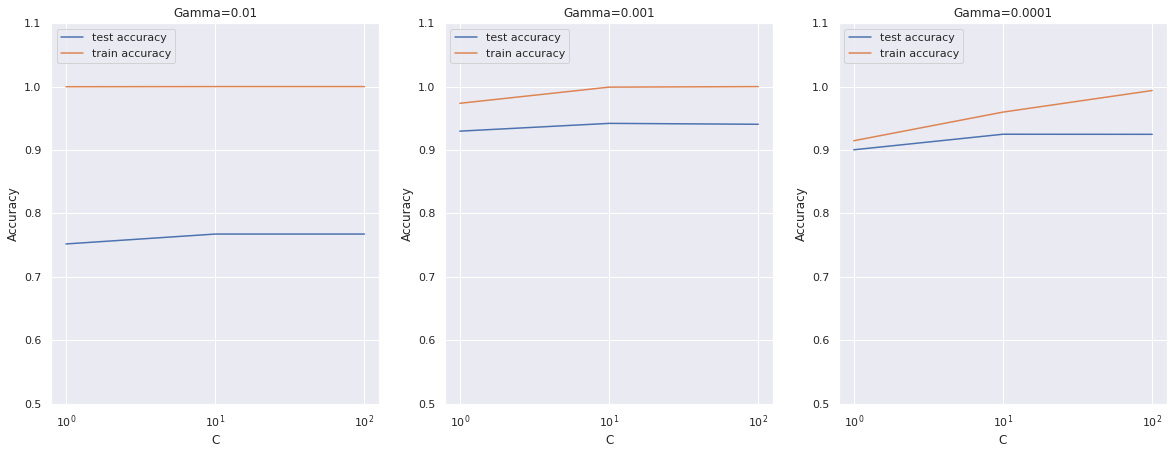

In [96]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(20,7))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [97]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9420238095238094 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [98]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9473809523809524 

[[3208    0   15    4    7   13   34    9    9    0]
 [   1 3678   15   17    4    4    7   15   10    2]
 [  13    9 3153   30   31    3   15   68   28    6]
 [   6    4   62 3276    7   52    1   54   44   11]
 [   3   12   29    4 3082    5   14   23    5   70]
 [  12    8   17   71   12 2786   29   36   18   12]
 [  21    2   18    1   16   22 3166   27    9    0]
 [   6   21   25   10   26    4    1 3387    3   45]
 [  16   28   25   54   18   34   12   27 2999   18]
 [  10   17   17   24   71    8    0  122   20 3097]] 



In [99]:
# different class-wise accuracy - #precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3299
           1       0.97      0.98      0.98      3753
           2       0.93      0.94      0.94      3356
           3       0.94      0.93      0.93      3517
           4       0.94      0.95      0.95      3247
           5       0.95      0.93      0.94      3001
           6       0.97      0.96      0.97      3282
           7       0.90      0.96      0.93      3528
           8       0.95      0.93      0.94      3231
           9       0.95      0.91      0.93      3386

    accuracy                           0.95     33600
   macro avg       0.95      0.95      0.95     33600
weighted avg       0.95      0.95      0.95     33600



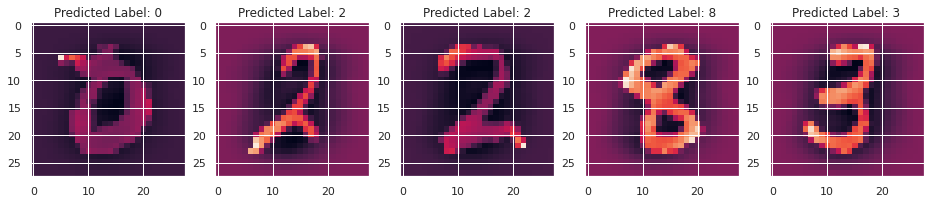

In [100]:
# Let us visualize our final model on unseen training dataset

df = np.random.randint(1,y_pred.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    d = X_test[j].reshape(28,28)
    plt.title(f'Predicted Label: {y_pred[j]}')
    plt.imshow(d)
plt.show()

In [130]:
#import file and reading few lines
test_df = pd.read_csv('digit_svm.csv')
del test_df["label"]
test_df.head(10)

pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       0       0       0  ...         0         0         0         0
5       0       0       0       0  ...         0         0         0         0
6       0       0       0       0  ...         0         0         0         0
7       0       0       0       0  ...         0         0         0         0
8       0       0       0       0  ...         0         0         0         0
9       0       0       0       0  ...         0         0         0         0

[10 rows x 784 columns]

In [131]:
test_df.shape 




(42000, 784)

In [132]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


In [133]:
# scaling the features
test_scaled = scale(test_df)


In [134]:
#model.predict
test_predict = model.predict(test_scaled)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


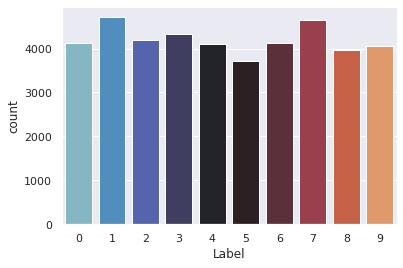

In [135]:
# Plotting the distribution of prediction
a = {'ImageId': np.arange(1,test_predict.shape[0]+1), 'Label': test_predict}
data_to_export = pd.DataFrame(a)
sns.countplot(data_to_export['Label'], palette = 'icefire')

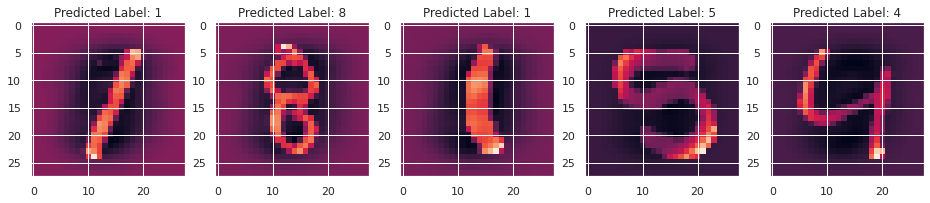

In [137]:
# Let us visualize few of predicted test numbers

df = np.random.randint(1,test_predict.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(df):
    plt.subplot(150+i+1)
    d = test_scaled[j].reshape(28,28)
    plt.title(f'Predicted Label: {test_predict[j]}')
    plt.imshow(d)
plt.show()